In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Dhiraj/OneDrive/Documents/Loan default prediction using ML/archive/Training Data.csv")

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df1= df.drop('Id',axis=1)

In [5]:
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [6]:
df1.describe()
#This function gives output for only numerical values.

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
df1.describe(include=['O']).T

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


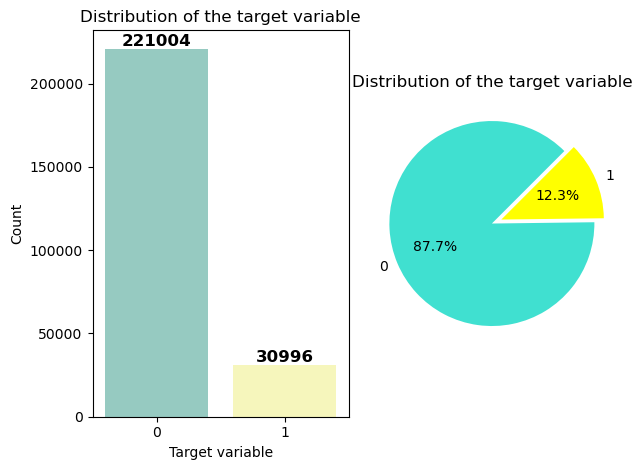

In [36]:
plt.subplot(1,2,1)
ax = sns.countplot(x='Risk_Flag', data=df, palette="Set3")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.Risk_Flag.value_counts(), labels = df.Risk_Flag.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of the target variable')
plt.tight_layout()
plt.show()


In [8]:
df1.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<Axes: >

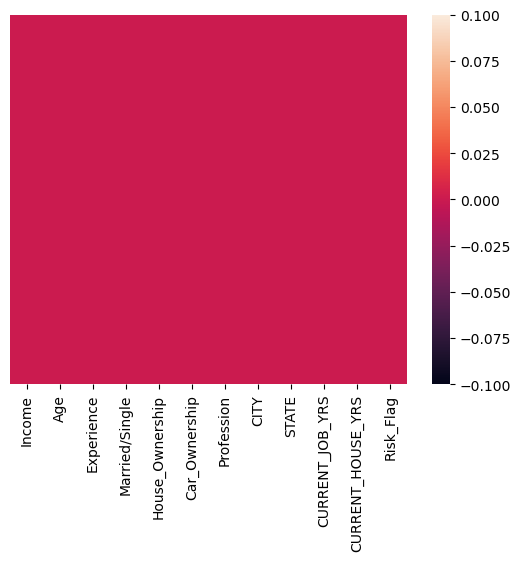

In [9]:
sns.heatmap(df1.isnull(),yticklabels=False)

In [10]:
# There are no null values in our data set.

C:\Users\Dhiraj\AppData\Local\Temp\ipykernel_26648\272655420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

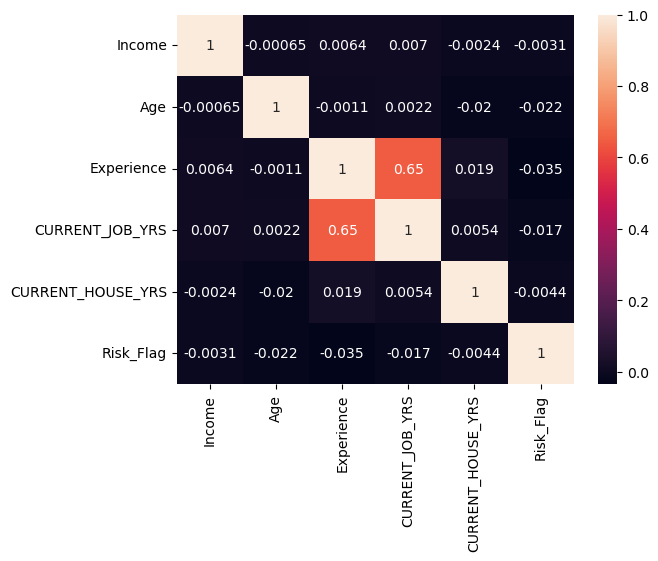

In [11]:
sns.heatmap(df1.corr(),annot=True)

In [12]:
df1.index.is_unique

True

In [13]:
# There is no duplicate observation in our data set.

In [14]:
# To check outliers, we will use boxplot.

<Axes: >

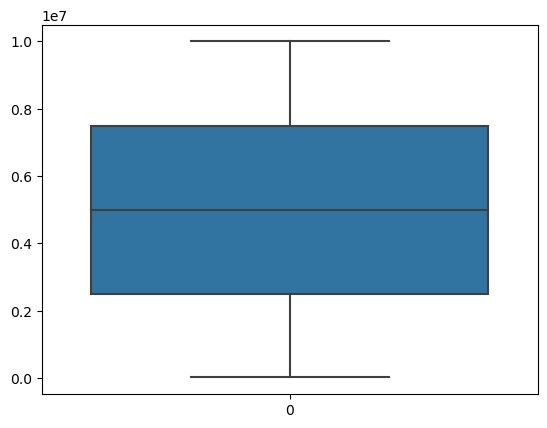

In [15]:
sns.boxplot(df1.Income)

<Axes: >

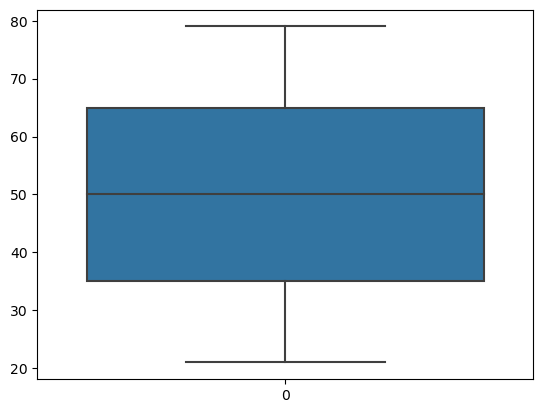

In [16]:
sns.boxplot(df1.Age)

<Axes: >

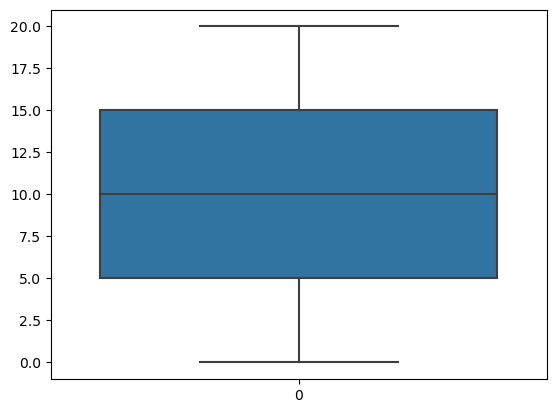

In [17]:
sns.boxplot(df1.Experience)

In [18]:
# From above boxplots, we can conclude that there are no outliers in it.

Text(0.5, 1.0, 'Age count')

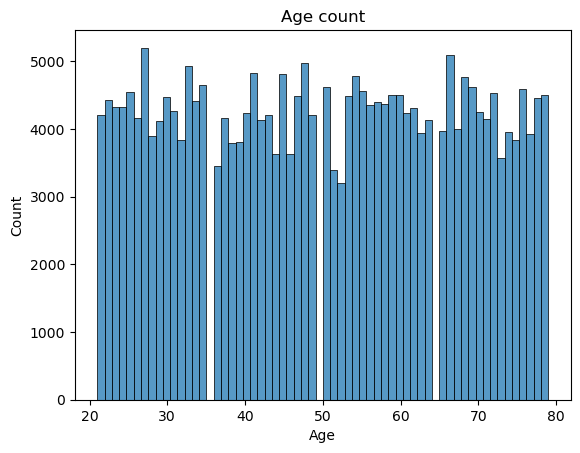

In [19]:
sns.histplot(df1.Age)
plt.xlabel('Age')
plt.title('Age count')

In [20]:
# From above graph we can conclude that our data set has nearly equal representation of each age group from 20 to 80.

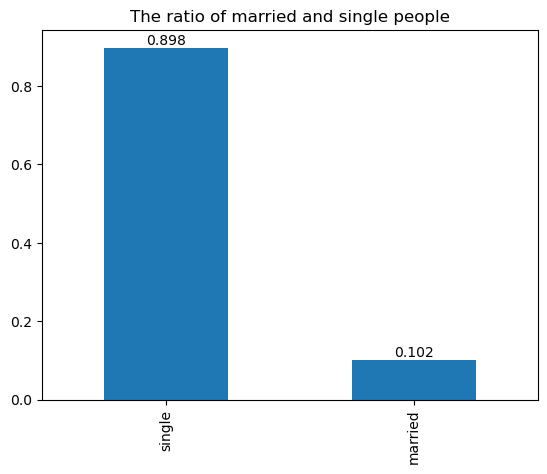

In [21]:
ax = df1["Married/Single"].value_counts(normalize=True).plot(kind="bar")
plt.title('The ratio of married and single people')
ax.bar_label(ax.containers[0], fmt="%.3f");


In [22]:
# fmt: This is short for "format" and is a parameter in the bar_label function.
#  "%.3f": This is a format string that specifies how the numeric values should be formatted.
# In this case, %.3f means that the numbers should be displayed as floating-point numbers with three decimal places.

Text(0.5, 1.0, 'Property Ownership')

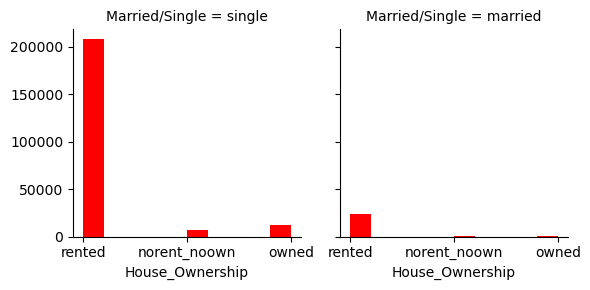

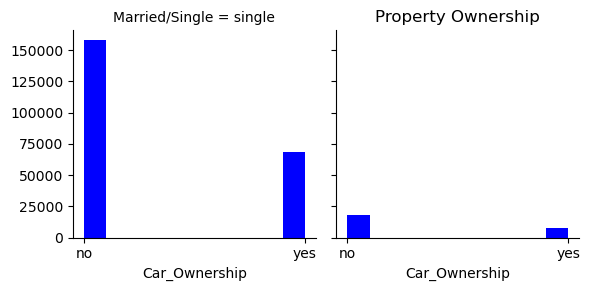

In [23]:
plot = sns.FacetGrid(df1, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'House_Ownership', color='red')

plot = sns.FacetGrid(df1, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'Car_Ownership', color='blue')

plt.title("Property Ownership")

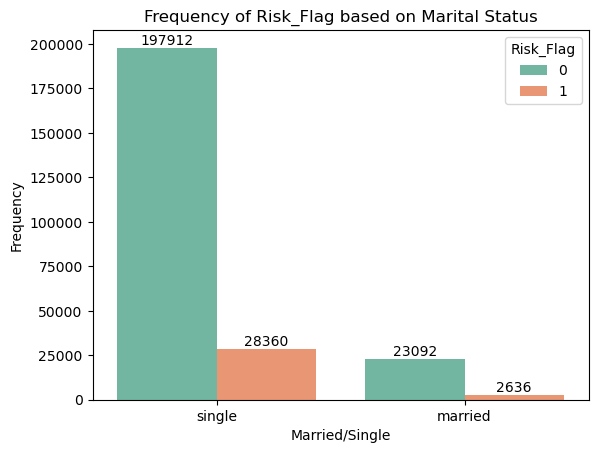

In [24]:
ax = sns.countplot(data=df1, x='Married/Single', hue='Risk_Flag', palette='Set2')
plt.title('Frequency of Risk_Flag based on Marital Status')
plt.ylabel('Frequency')
for p in ax.containers:
    ax.bar_label(p)
plt.show()


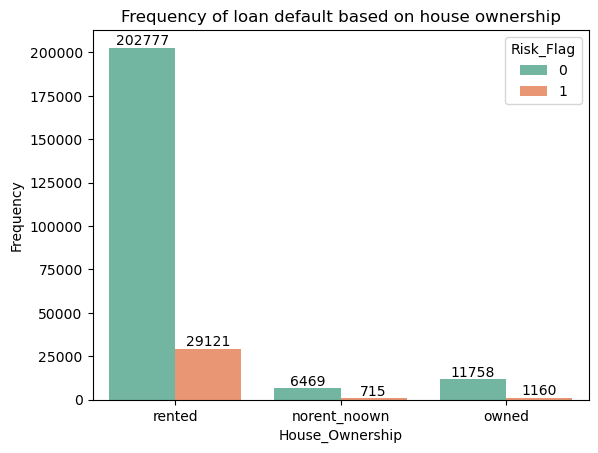

In [25]:
ax = sns.countplot(data=df1, x='House_Ownership', hue='Risk_Flag', palette='Set2')
plt.title('Frequency of loan default based on house ownership')
plt.ylabel('Frequency')
for p in ax.containers:
    ax.bar_label(p)
plt.show()

In [26]:
df1.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [27]:

df1.groupby("Profession")["Income"].agg(['min','max',"mean"]).sort_values(by='mean',ascending=False)

,min,max,mean
Profession,,,
Petroleum_Engineer,22921,9968353,5.443310e+06
Psychologist,33224,9985964,5.357795e+06
Designer,12841,9996946,5.336802e+06
Scientist,13792,9975985,5.282710e+06
Surgeon,18215,9995445,5.235359e+06
Comedian,13429,9984983,5.199539e+06
Chemical_engineer,26926,9984718,5.189805e+06
Mechanical_engineer,37057,9990505,5.175032e+06
Artist,31297,9976619,5.164765e+06


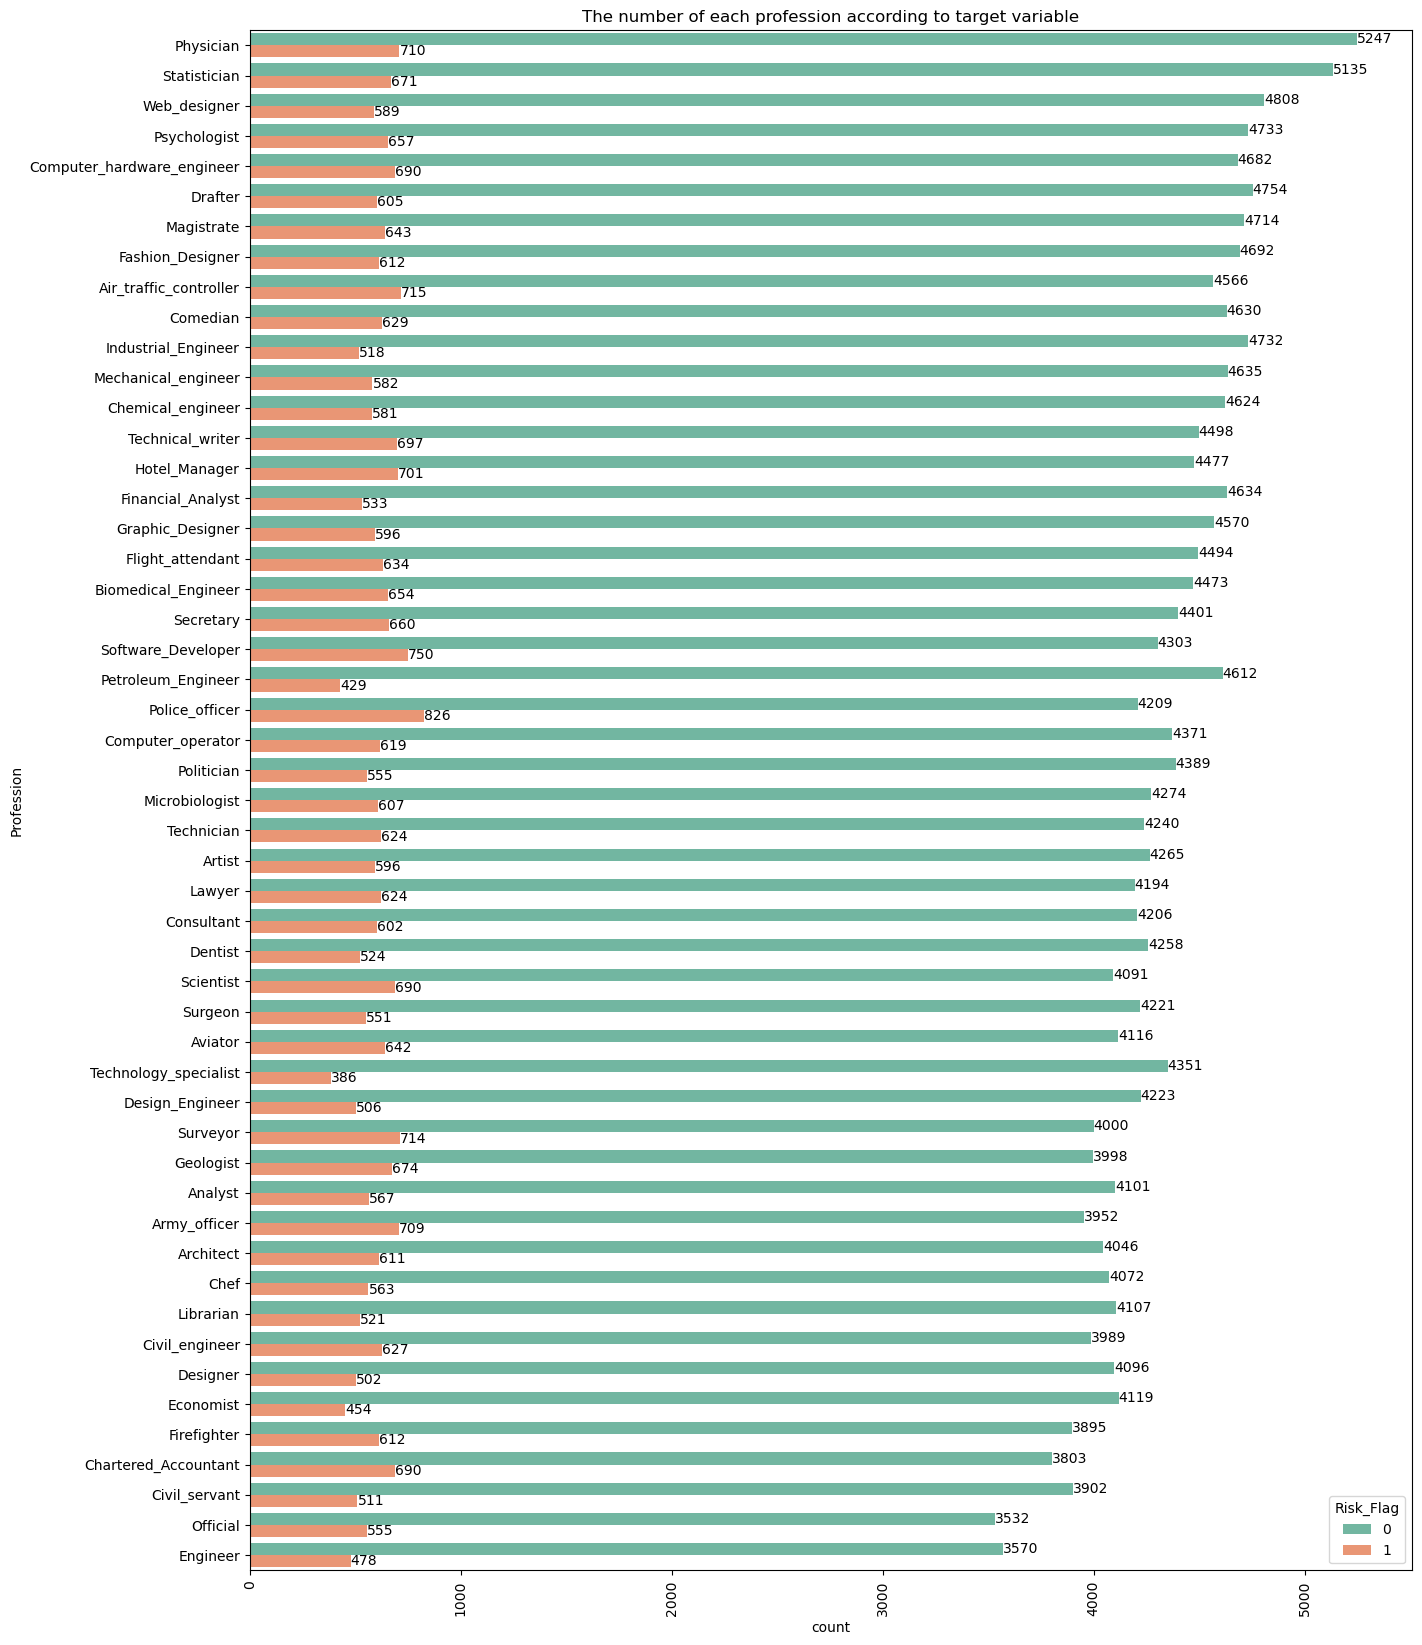

In [28]:
plt.figure(figsize=(15,20))
ax = sns.countplot(data = df1 , y=df["Profession"].sort_values(), hue  = "Risk_Flag",order = df1['Profession'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title('The number of each profession according to target variable')
for bars in ax.containers:
        ax.bar_label(bars)

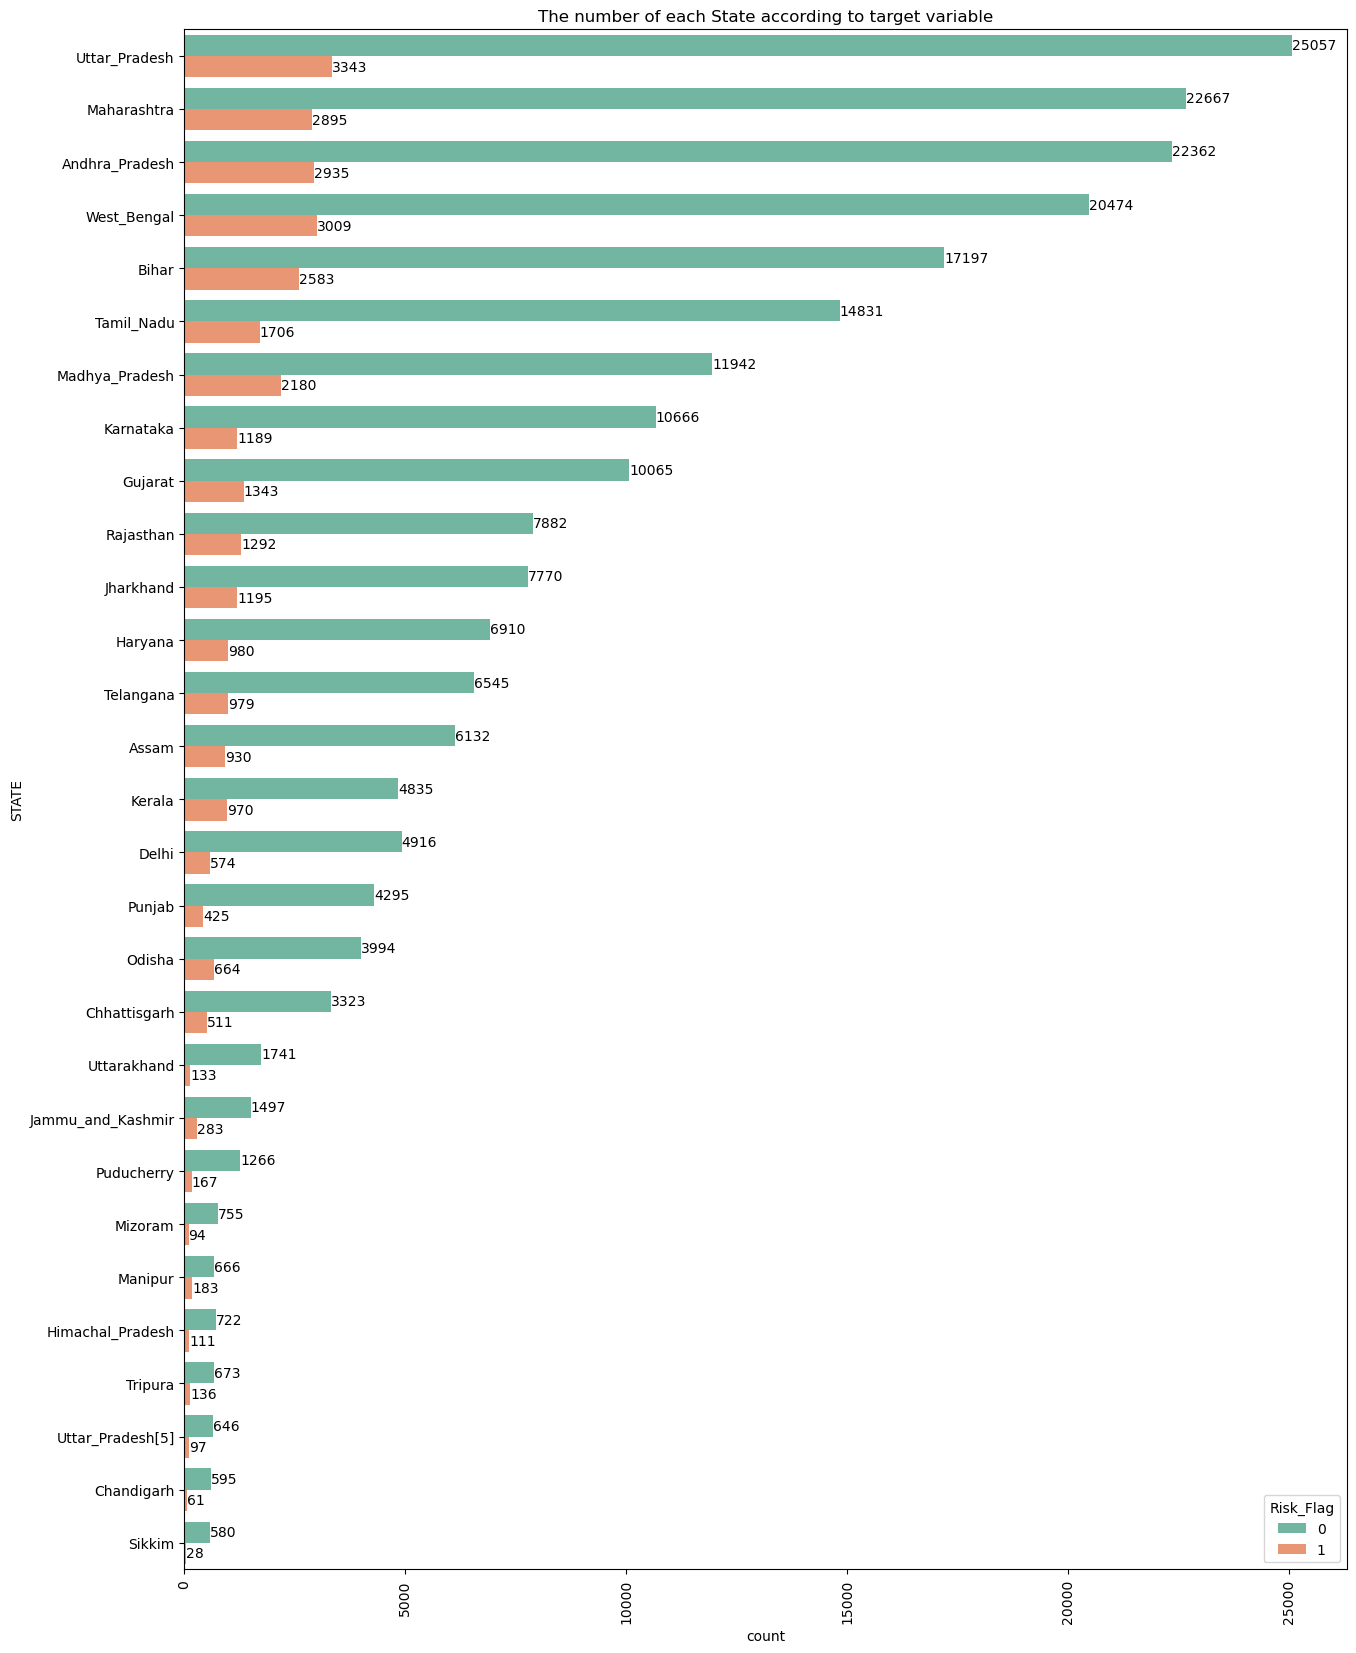

In [29]:
plt.figure(figsize=(15,20))
ax = sns.countplot(data = df1 , y=df1['STATE'].sort_values(), hue  = "Risk_Flag",order = df1['STATE'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title('The number of each State according to target variable')
for bars in ax.containers:
        ax.bar_label(bars)

# Data Cleaning

In [30]:
df1.drop('STATE', axis=1)
df1.drop('CITY',axis=1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Puducherry,0,10,0


In [32]:
df1["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

C:\Users\Dhiraj\AppData\Local\Temp\ipykernel_26648\745285026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['Risk_Flag'].sort_values().drop('Risk_Flag').plot(kind = 'barh');


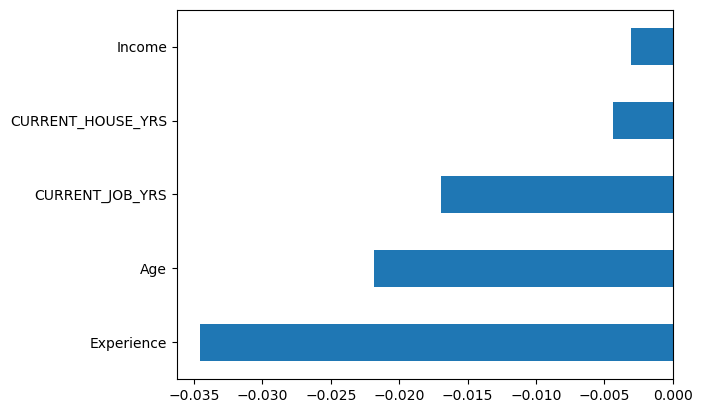

In [35]:
df1.corr()['Risk_Flag'].sort_values().drop('Risk_Flag').plot(kind = 'barh');

In [42]:
df1.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [43]:
df2 = df1.drop(["CITY","STATE"],axis = 1)

In [45]:
df2

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,0,10,0


In [46]:
df_dummy =pd.get_dummies(df2, drop_first = True)

In [52]:
df_dummy

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,1303834,23,3,3,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,6256451,41,2,2,12,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
251996,2843572,26,10,6,11,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,7,12,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,10,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_dummy.shape

(252000, 60)

In [54]:
X = df_dummy.drop(columns='Risk_Flag')
y = df_dummy['Risk_Flag']


In [59]:
def useModel(model, X_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Classification report : ")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plotting confusion matrix
    sns.set_palette(sns.color_palette())
    _, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 20})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=13);
    ax.set_yticklabels(labels[::-1], fontsize=13);
    ax.set_ylabel('Prediction', fontsize=13);
    ax.set_xlabel('Ground Truth', fontsize=13)
    ax.set_title("Confussion - Matix")


In [60]:
# Using K-Nearest-Neighborhood

from sklearn.neighbors import KNeighborsClassifier

useModel(KNeighborsClassifier(n_neighbors=3), X, y)

NameError: name 'train_test_split' is not defined